In [56]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
def get_dataframe(name):
    df = pd.read_csv(f'{name}.csv')
    df = df.dropna()
    return df

In [58]:
name = "CHL5230-F23-Datathon #1-Dataset1"
df = get_dataframe(name)
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


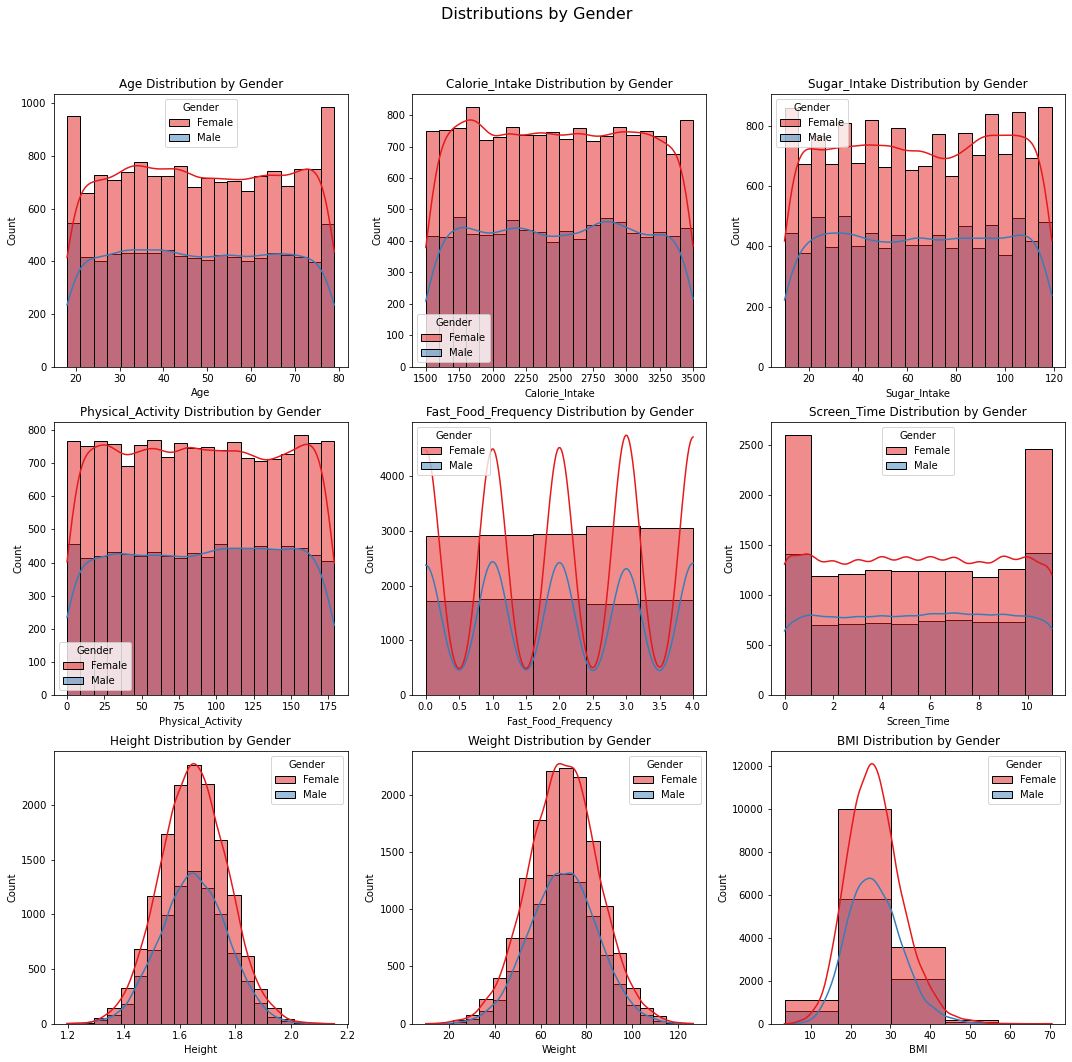

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Distributions by Gender", fontsize=16)

variables = ['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI']
bins_arr = [20, 20, 20, 20, 5, 10, 20, 20, 5]

for i, variable in enumerate(variables):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    
    sns.histplot(data=df, x=variable, bins=bins_arr[i], kde=True, hue='Gender', palette='Set1', ax=ax)
    ax.set_title(f'{variable} Distribution by Gender')


plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

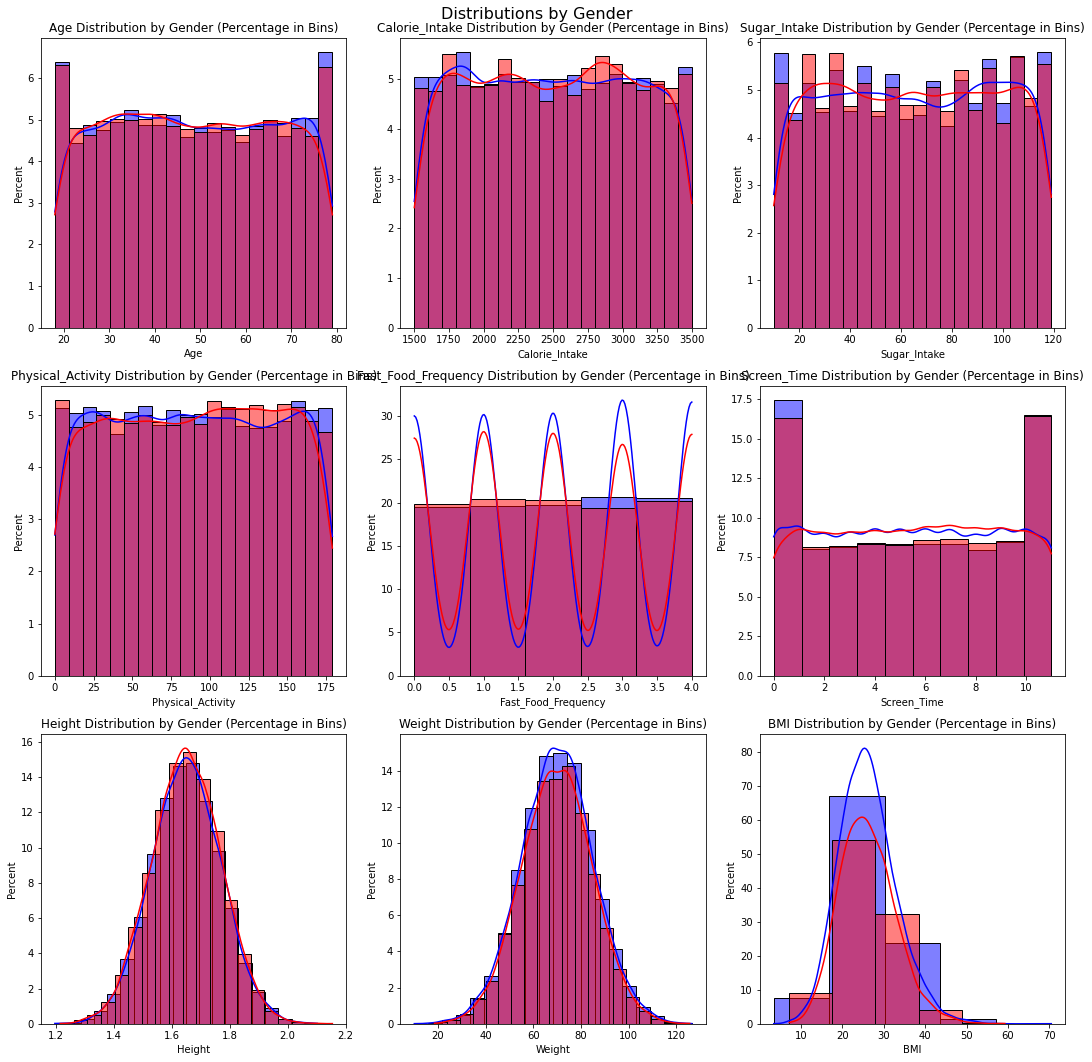

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

df_female = df[df['Gender'] == 'Female']
df_male = df[df['Gender'] == 'Male']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Distributions by Gender", fontsize=16)

variables = ['Age', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI']
bins_arr = [20, 20, 20, 20, 5, 10, 20, 20, 5]

for i, variable in enumerate(variables):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    
    sns.histplot(data=df_female, x=variable, bins=bins_arr[i], kde=True, stat='percent', label='Female', color='blue', ax=ax)
    sns.histplot(data=df_male, x=variable, bins=bins_arr[i], kde=True, stat='percent', label='Male', color='red', ax=ax)
    ax.set_title(f'{variable} Distribution by Gender (Percentage in Bins)')
    


plt.tight_layout()
plt.show()


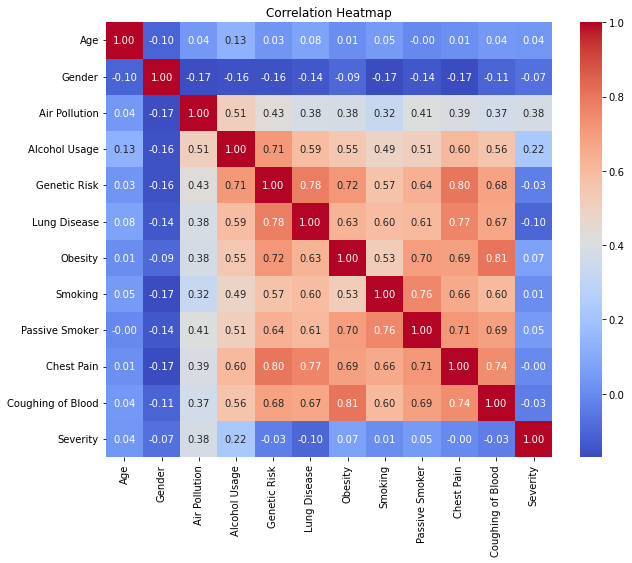

In [61]:
correlation_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

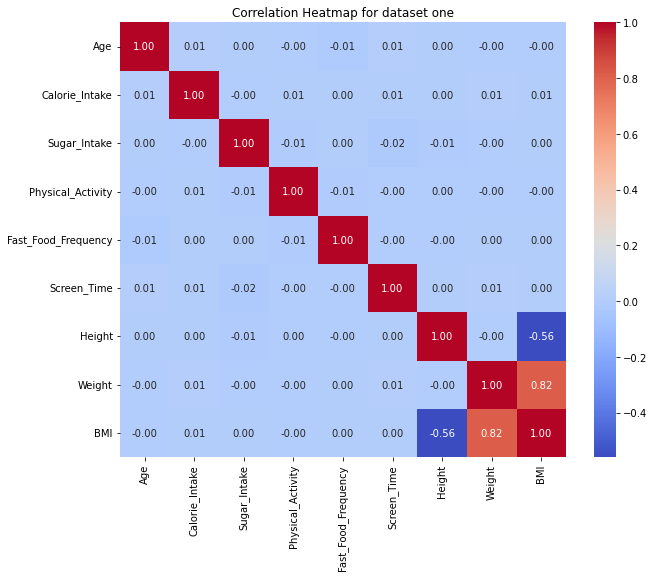

In [62]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for dataset one")
plt.show()

![BMI categories](./Bmi-chart-1.jpg)

In [63]:
bmi_bins = [0, 18.5, 25, 30, 40, float('inf')]
bmi_labels = ['Underweight', 'Healthy', 'Overweight', 'Obese', 'Severely Obese']
df['BMI'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,Obese
1,69,Female,2090,106,27,0,9,1.629449,74.273566,Overweight
2,46,Male,2938,11,45,2,3,1.637726,71.453466,Overweight
3,32,Female,3022,48,112,1,8,1.514198,98.163045,Severely Obese
4,60,Female,2350,83,115,0,7,1.410559,57.323914,Overweight


In [64]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['BMI'] = df['BMI'].map({'Underweight': 0, 'Healthy': 1, 'Overweight': 2, 'Obese': 3, 'Severely Obese': 4})
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,1,3091,90,160,4,1,1.569070,81.199394,3
1,69,1,2090,106,27,0,9,1.629449,74.273566,2
2,46,0,2938,11,45,2,3,1.637726,71.453466,2
3,32,1,3022,48,112,1,8,1.514198,98.163045,4
4,60,1,2350,83,115,0,7,1.410559,57.323914,2


In [65]:
name = "CHL5230-F23-Datathon#1-Dataset2"
df2 = get_dataframe(name)
df2.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


In [35]:
#BMI KNN with height and weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df[['Sugar_Intake', 'Calorie_Intake', 'Gender', 'Age', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']]
y = df['BMI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=20)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 468  429    1    0    0]
 [   4 2177  152    1    0]
 [   0  330 1523   95    0]
 [   0    1  404 1238    0]
 [   0    0    0  220   18]]
              precision    recall  f1-score   support

           0       0.99      0.52      0.68       898
           1       0.74      0.93      0.83      2334
           2       0.73      0.78      0.76      1948
           3       0.80      0.75      0.77      1643
           4       1.00      0.08      0.14       238

    accuracy                           0.77      7061
   macro avg       0.85      0.61      0.64      7061
weighted avg       0.79      0.77      0.75      7061



/Users/aaaa.ashley/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


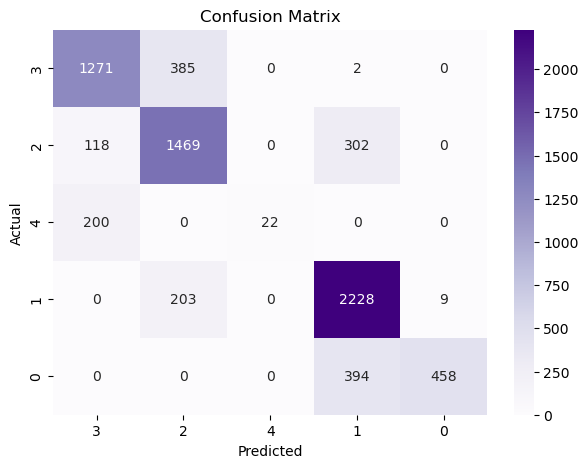

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['BMI'].unique()
# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
#BMI KNN without height and weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df[['Sugar_Intake', 'Calorie_Intake', 'Gender', 'Age', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']]
y = df['BMI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=20)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  16  539  217  126    0]
 [  50 1380  576  328    0]
 [  36 1148  489  275    0]
 [  38 1003  402  200    0]
 [   8  140   53   37    0]]
              precision    recall  f1-score   support

           0       0.11      0.02      0.03       898
           1       0.33      0.59      0.42      2334
           2       0.28      0.25      0.27      1948
           3       0.21      0.12      0.15      1643
           4       0.00      0.00      0.00       238

    accuracy                           0.30      7061
   macro avg       0.18      0.20      0.17      7061
weighted avg       0.25      0.30      0.25      7061



/Users/aaaa.ashley/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aaaa.ashley/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aaaa.ashley/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: U

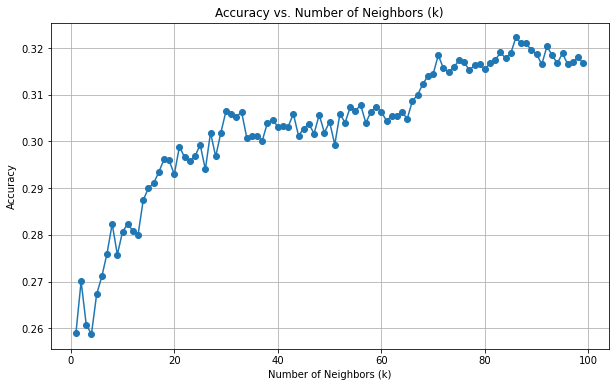

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = df[['Sugar_Intake', 'Calorie_Intake', 'Gender', 'Age', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time']]
y = df['BMI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = []
accuracy_values = []
best_k = 0
max_acc = 0

for k in range(1, 100):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)
    if accuracy > max_acc:
        max_acc = accuracy
        best_k = k


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

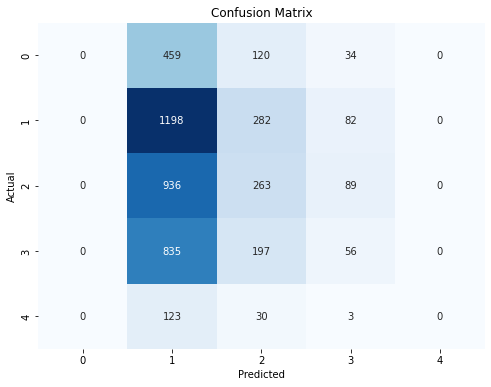

Accuracy: 0.32228595708519225
Precision: 0.2416650273272385
Recall: 0.32228595708519225
F1-Score: 0.24067822696807287


In [67]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

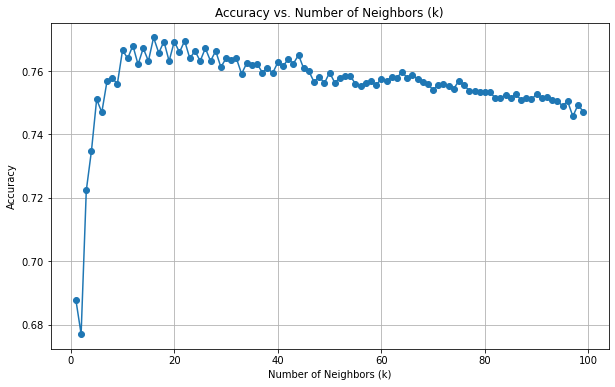

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = df[['Sugar_Intake', 'Calorie_Intake', 'Gender', 'Age', 'Physical_Activity', 'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight']]
y = df['BMI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = []
accuracy_values = []
best_k = 0
max_acc = 0

for k in range(1, 100):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)
    if accuracy > max_acc:
        max_acc = accuracy
        best_k = k


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

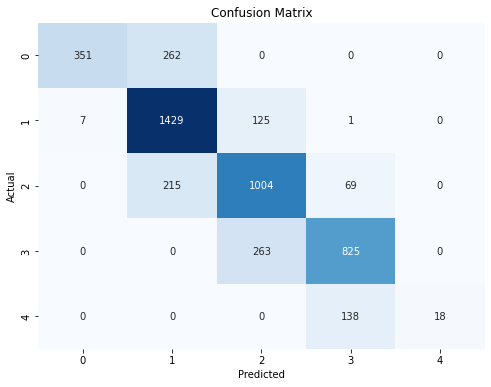

Accuracy: 0.7705544933078394
Precision: 0.791590859017729
Recall: 0.7705544933078394
F1-Score: 0.7593243667272825


In [69]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)


confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

In [ ]:
# Preprocess the data
# split the data into features and label
X = df2[['Age', 'Gender', 'Alcohol Usage','Genetic Risk', 'Severity','Obesity','Smoking', 'Passive Smoker','Chest Pain','Coughing of Blood']]
y = df2['Lung Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
# Get unique classes
classes = df2['Lung Disease'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=10)
    accuracy_rate.append(score.mean())
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=10)
    error_rate.append(1-score.mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# Preprocess the data
# split the data into features and label
X = df2[['Alcohol Usage','Genetic Risk', 'Obesity','Smoking', 'Chest Pain','Coughing of Blood']]
y = df2['Lung Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))